In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Avoid overflow
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [14]:
activation_functions = {
    "sigmoid": (sigmoid, sigmoid_derivative),
    "relu": (relu, relu_derivative),
    "leaky_relu": (leaky_relu, leaky_relu_derivative),
    "tanh": (tanh, tanh_derivative),
}

In [15]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation="sigmoid"):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size) - 0.5
        self.weights_hidden_output = np.random.rand(hidden_size, output_size) - 0.5
        self.bias_hidden = np.random.rand(hidden_size) - 0.5
        self.bias_output = np.random.rand(output_size) - 0.5

        # Set activation function
        if activation not in activation_functions:
            raise ValueError(f"Unsupported activation function: {activation}")
        self.activation, self.activation_derivative = activation_functions[activation]
        self.losses = []

    def feedforward(self, X):
        # Hidden layer computation
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activation(self.hidden_input)

        # Output layer computation with softmax
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = softmax(self.output_input)
        return self.output

    def backpropagate(self, X, y, learning_rate=0.01):
        # Error at output layer
        output_error = self.output - y
        output_delta = output_error  # For softmax + cross-entropy, derivative simplifies to this

        # Error at hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activation_derivative(self.hidden_input)

        # Update weights and biases
        self.weights_hidden_output -= learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= learning_rate * np.sum(output_delta, axis=0)

        self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden -= learning_rate * np.sum(hidden_delta, axis=0)

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagate(X, y, learning_rate)
            loss = -np.sum(y * np.log(self.output + 1e-9)) / X.shape[0]
            self.losses.append(loss)
            if epoch % 100 == 0:
                loss = -np.sum(y * np.log(self.output + 1e-9)) / X.shape[0]
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        output = self.feedforward(X)
        return np.argmax(output, axis=1)
    def plot_loss(self):
        plt.plot(self.losses)
        plt.title("Training Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.grid(True)

    def plot_decision_boundary(self, X, y):
        h = 0.02  # Step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.75)
        plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', marker='o', s=100)
        plt.title(f"Decision Boundary with {activation} Activation")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.colorbar()


Training with sigmoid activation function:
Epoch 0, Loss: 0.6933058837997941
Epoch 100, Loss: 0.6930964491989455
Epoch 200, Loss: 0.692944930644521
Epoch 300, Loss: 0.6927825955705911
Epoch 400, Loss: 0.6925499912564654
Epoch 500, Loss: 0.6921430876266612
Epoch 600, Loss: 0.6913055927160816
Epoch 700, Loss: 0.6892549743637486
Epoch 800, Loss: 0.6831249156313136
Epoch 900, Loss: 0.6615442565351388

Predictions with sigmoid activation:
Input: [0 0], Prediction: [0], Target: 0
Input: [0 1], Prediction: [1], Target: 1
Input: [1 0], Prediction: [0], Target: 1
Input: [1 1], Prediction: [0], Target: 0


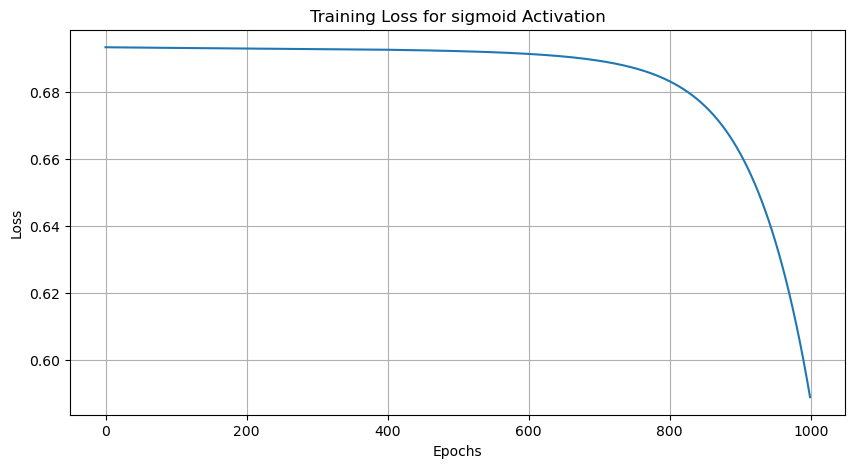

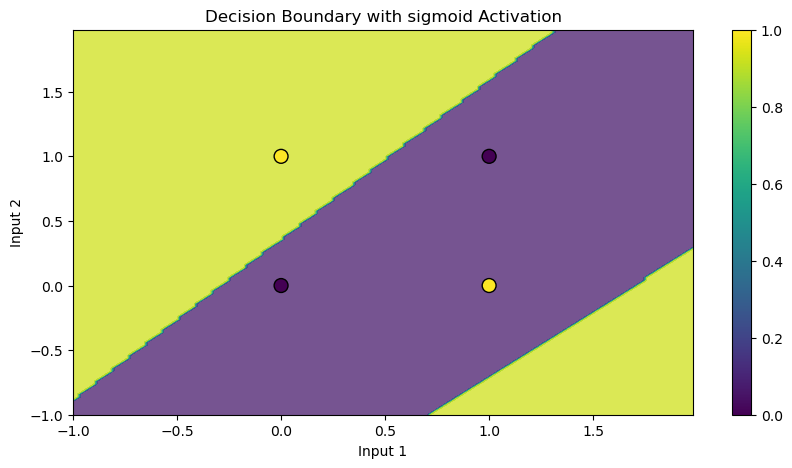


Training with relu activation function:
Epoch 0, Loss: 0.703060085641782
Epoch 100, Loss: 0.4877755624257661
Epoch 200, Loss: 0.09248806750195813
Epoch 300, Loss: 0.028841515282577307
Epoch 400, Loss: 0.015510890892861921
Epoch 500, Loss: 0.010302326964637152
Epoch 600, Loss: 0.0075902059056253395
Epoch 700, Loss: 0.006007093659387458
Epoch 800, Loss: 0.0049373751188639715
Epoch 900, Loss: 0.004193385938046344

Predictions with relu activation:
Input: [0 0], Prediction: [0], Target: 0
Input: [0 1], Prediction: [1], Target: 1
Input: [1 0], Prediction: [1], Target: 1
Input: [1 1], Prediction: [0], Target: 0


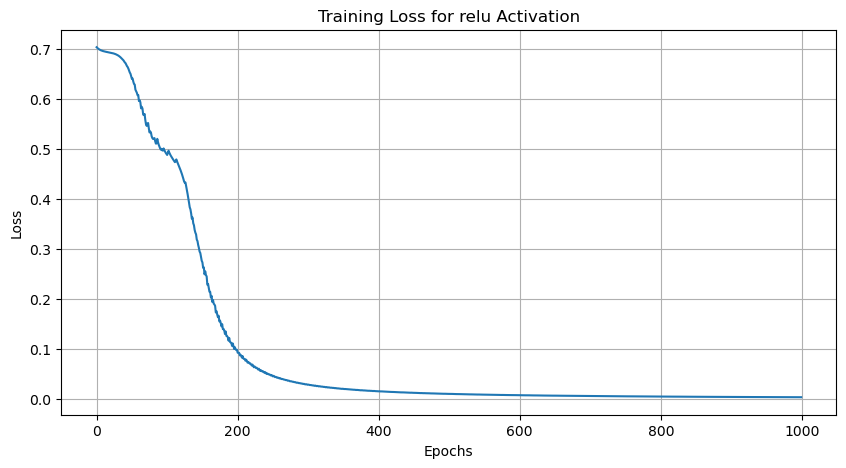

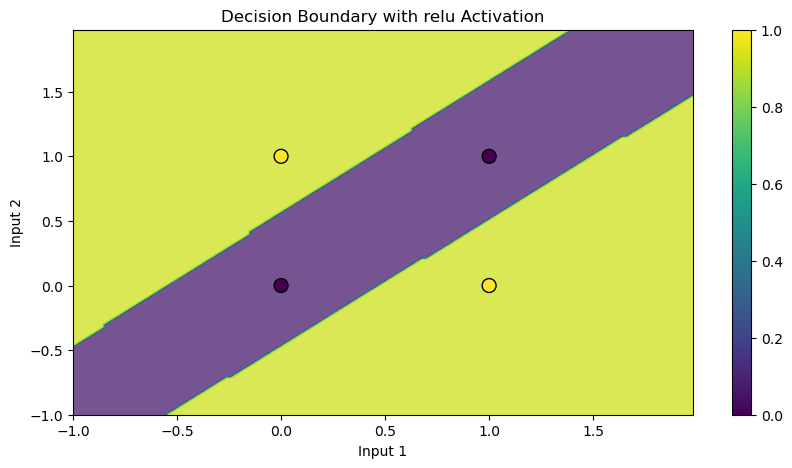


Training with leaky_relu activation function:
Epoch 0, Loss: 0.7022090330561458
Epoch 100, Loss: 0.2522739001176356
Epoch 200, Loss: 0.0286725569438947
Epoch 300, Loss: 0.013629795303194928
Epoch 400, Loss: 0.00868902833578013
Epoch 500, Loss: 0.006308687859517757
Epoch 600, Loss: 0.00491642708290946
Epoch 700, Loss: 0.004020001420490205
Epoch 800, Loss: 0.0033861271166993195
Epoch 900, Loss: 0.002922315577550557

Predictions with leaky_relu activation:
Input: [0 0], Prediction: [0], Target: 0
Input: [0 1], Prediction: [1], Target: 1
Input: [1 0], Prediction: [1], Target: 1
Input: [1 1], Prediction: [0], Target: 0


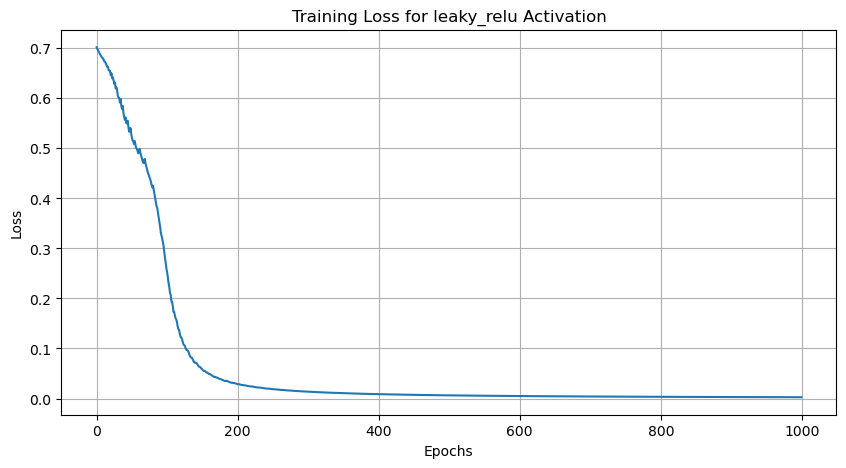

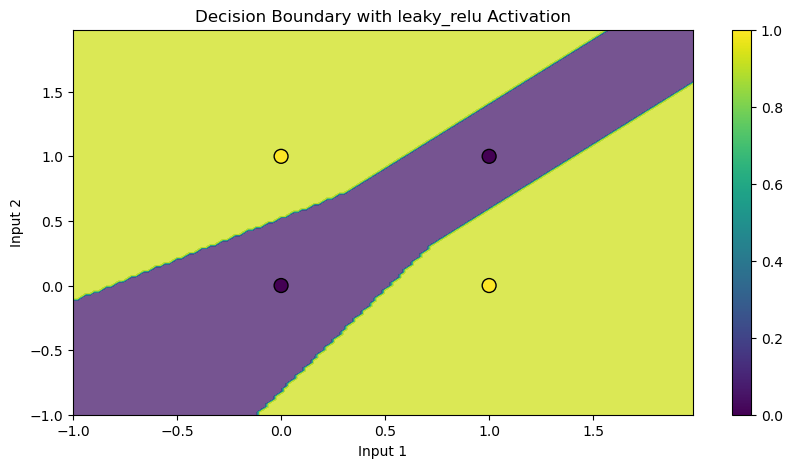


Training with tanh activation function:
Epoch 0, Loss: 0.7050592212031151
Epoch 100, Loss: 0.6450403230742863
Epoch 200, Loss: 0.0653910119160539
Epoch 300, Loss: 0.02323914027412412
Epoch 400, Loss: 0.013730704141374596
Epoch 500, Loss: 0.009673258362798382
Epoch 600, Loss: 0.007444850531658951
Epoch 700, Loss: 0.006041926185211106
Epoch 800, Loss: 0.005079551012179298
Epoch 900, Loss: 0.004379269681600167

Predictions with tanh activation:
Input: [0 0], Prediction: [0], Target: 0
Input: [0 1], Prediction: [1], Target: 1
Input: [1 0], Prediction: [1], Target: 1
Input: [1 1], Prediction: [0], Target: 0


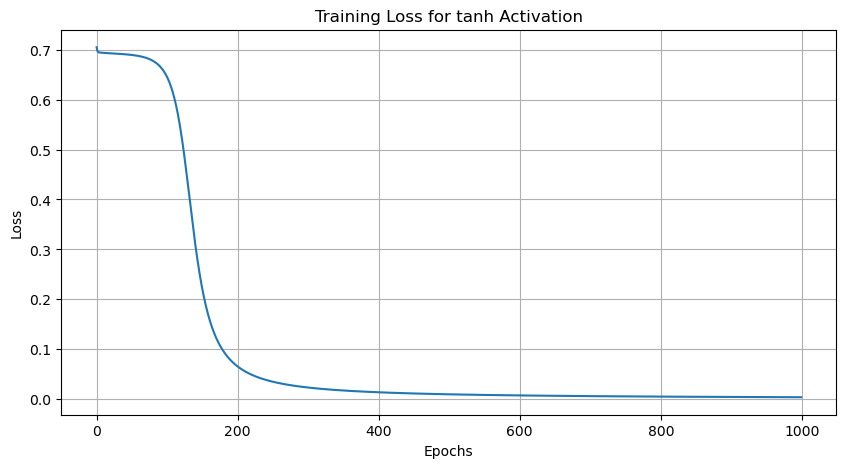

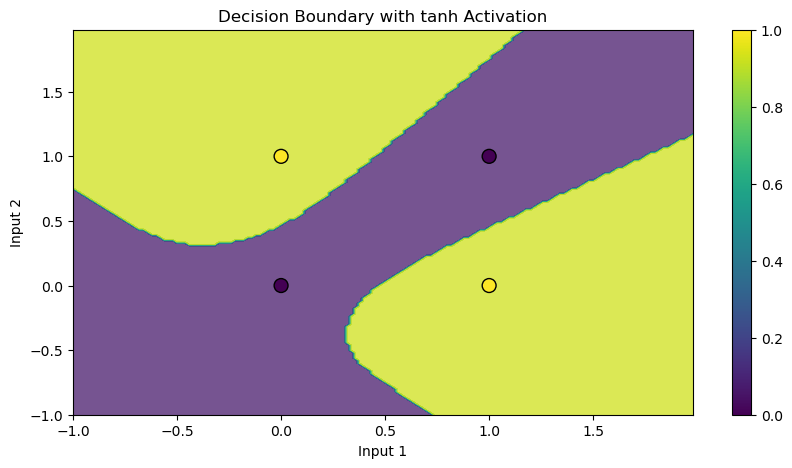

In [16]:
# XOR problem as a classification task
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # One-hot encoding

# Create and train the neural network
for activation in ["sigmoid", "relu", "leaky_relu", "tanh"]:
        print(f"\nTraining with {activation} activation function:")
        nn=NeuralNetwork(input_size=2, hidden_size=4, output_size=2,activation=activation)
        nn.train(X, y, epochs=1000, learning_rate=0.1)

        # Test the network
        print(f"\nPredictions with {activation} activation:")
        for sample, target in zip(X, y):
            prediction = nn.predict(sample.reshape(1, -1))
            print(f"Input: {sample}, Prediction: {prediction}, Target: {np.argmax(target)}")
        # Plot the loss curve
        plt.figure(figsize=(10, 5))
        nn.plot_loss()
        plt.title(f"Training Loss for {activation} Activation")
        plt.show()

        # Plot the decision boundary
        plt.figure(figsize=(10, 5))
        nn.plot_decision_boundary(X, y)
        plt.show()
    